Welcome to Computer Vision! In this homework we will cover image access manipulation, image filtering, and edge detection topics.


---


Few instructions to keep in mind before you start:


1.   The assignments are slightly challenging yet they will be graded leniently. Hence, please attempt them on your own.
2. The use of AI for all assignment is allowed per the course polices. However, make sure that you understand what is going on as AI is prohibited for other assessements.
3. There are multiple vision libraries available in python (cv2, Pillow, PIL, etc..). The use of cv2 is recommended but there are no restrictions on that. Make sure to check the color format followed in the library you use (Ex. cv2 --> BGR).
2. Some questions are formulated in a way that eliminates the possibilty of replicated answers. *Cheating will not be tolerated.*
4. Please submit your answer as a notebook (.ipynb) along with any additional files in a zip file. Failure to do so will be penalized.
5. Each assignment is worth 5% of your final grade but will be graded out of 100 to leave larger space for partial grades.
6. For inquires about the homework please send an email to asajun@aus.edu


Finally, have fun... ( ﾉ ﾟｰﾟ)ﾉ


---



**Q.1. Beyond What You See.** ( /35)


---


All related files to this question are found under Q1 folder.

**1.1.**  In the August of 1999, Japan decided to re-design its flag. The circle color was changed from #B0313F color to #BC002D color. The Japanese flag before these "significant" changes is provided to you in Q1 Folder.  Your task is to apply the neccessary changes and show the flag before and after it was redesigned. [ /10]



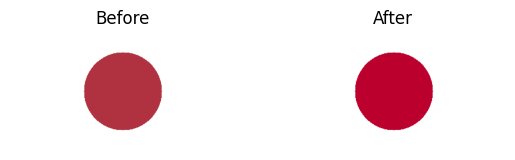

In [ ]:
#Solution (Pixel Access)
import matplotlib.pyplot as plt
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

pre = cv.imread("/content/japan_flag.png")
pre = cv.cvtColor(pre, cv.COLOR_BGR2RGB) #changing BGR to RGB (cv2 default)

new = pre.copy()

#6 points for changing the pixels correctly (2 points per value)

changes = np.all(new == [176, 49, 63], axis=-1) # B0313F = (176, 49, 63)
new_color = [188, 0, 45] # BC002D = (188, 0, 45)
new[changes] = new_color

#4 points for plotting both flags (2 points per flag)
# assert image unique values for grading

plt.subplot(1, 2, 1)
plt.imshow(pre)
plt.title('Before')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(new)
plt.title('After')
plt.axis('off')

plt.show()

**1.2.** After hearing that Aokigahara Forest in Japan is a weird place, your curiosity pushes you into googling how it looks like. However, the image that you find (forest.jpg) seems too fascinating to be true. Find the issue in this image and fix it. [ /10]

<a href="https://ibb.co/3dXJmbX"><img src="https://i.ibb.co/mTsx5Ks/forest.jpg" alt="forest" border="0"></a>

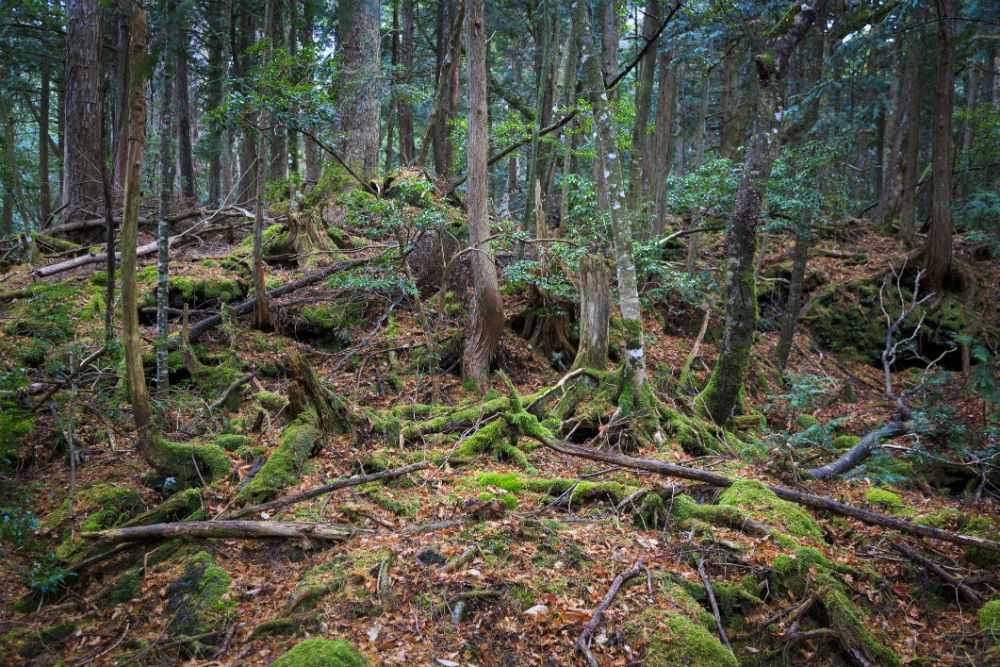

In [ ]:
#Solution (Channel Access)
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread("/content/forest.jpg")
fixed = img.copy()

#Swapping Red and Green channels.
# 5 points per channel swap

fixed[:,:,1] = img[:,:,0]
fixed[:,:,0] = img[:,:,1]

cv2_imshow(fixed)

**1.3.** Vision data can extend beyond the visible RGB spectrum. While using google earth, you notice an area below the deadsea between Jordan and Palestine (Map_RGB.tiff) in which you are not sure whether it is a waterbody, a cropland, or a mountain. Our good friends at Sentinel satellites provide you with a Near-Infrared (NIR) image of the same map (Map_NIR.tiff) to help you identify the nature of that area. Use the provided images to draw a conclusion about this area (cmap: "Paired") and discuss your results. [/15]

<a href="https://ibb.co/LN5Qb60"><img src="https://i.ibb.co/NTS1QpF/pic.png" alt="pic" border="0"></a>



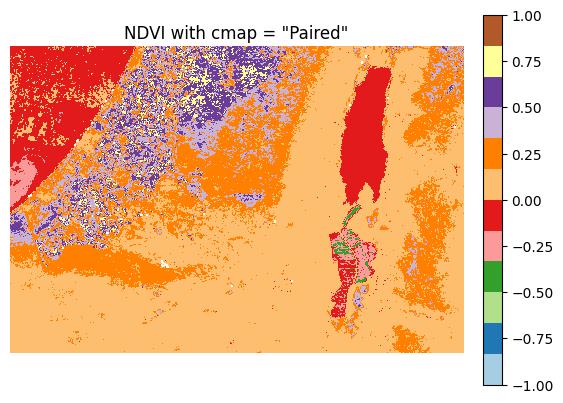

In [21]:
#Solution
# 3 points for identifying an appropriate index
#NDVI = Red - NIR / Red + NIR

# 4 points for appropriate channels reading
# --> 1 points for the red channel
# --> 3 points for reading NIR as grayscale
rgb_map = cv2.imread('/content/Map_RGB.tiff')
nir_map = cv2.imread('/content/Map_NIR.tiff')
rgb_map = cv2.cvtColor(rgb_map, cv2.COLOR_BGR2RGB)
nir_map = cv2.cvtColor(nir_map, cv2.COLOR_BGR2GRAY)
#Obtain the value of the red channel
r,g,b = cv2.split(rgb_map)
red = r.astype(np.float32)

#Obtain the NIR value
NIR = nir_map.astype(np.float32)

# 3 points for apporpriate calculations
#Calcualting NDVI
np.seterr(divide='ignore', invalid='ignore')
NDVI = (NIR-red)/(NIR + red)

# 5 points for the map generated
# --> 2 for plotting the map correctly
# --> 3 points for correct conclusions

plt.imshow(NDVI, cmap = "Paired")
plt.title('NDVI with cmap = "Paired"')
plt.colorbar(fraction =0.046, pad=0.04)
plt.axis('off')
plt.show()

**ANS:** The area of question is a waterbody as indicated by the NDVI landcover map generated.



---


**Q.2. Can you help out?** (/40)


---


All related files to this question is available in Q.2. Folder.

**2.1.** This question has three short answer sub-parts (/10)

**2.1.1** Explain breifly the difference between cross-correlation and convolution. (/2)

**ANS:** convolution is filtering with a flipped kernel, and filtering with an upright kernel is known as cross-correlation


**2.2.2** What happens when a kernel is applied to an image without padding? (/2)


**ANS:** The image could shrink to a smaller size and the kernel would not capture information on the edges.

**2.2.2** Apply two padding techinques on an image of your choice. show a clear padded images along with the original image (/6)

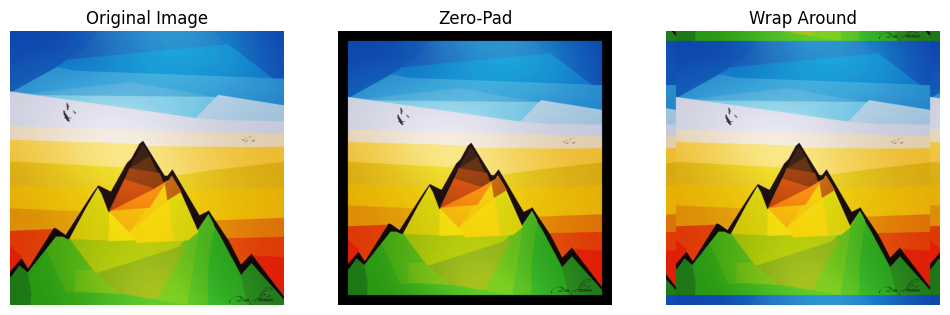

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def zero_pad(image, pad_size):
    return np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='constant', constant_values=0)

def circular_pad(image, pad_size):
    rows, cols, _ = image.shape
    return np.pad(image, ((pad_size, pad_size), (pad_size, pad_size), (0, 0)), mode='wrap')

image_path = "/content/rand.jpeg"
original_image = cv2.imread(image_path)

#2 points
zero_padded_image = zero_pad(original_image, 50)

#2 points
circular_padded_image = circular_pad(original_image, 50)

#2 points
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[1].imshow(cv2.cvtColor(zero_padded_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Zero-Pad')
axes[2].imshow(cv2.cvtColor(circular_padded_image, cv2.COLOR_BGR2RGB))
axes[2].set_title('Wrap Around')

for ax in axes:
    ax.axis('off')

plt.show()

2.2. The Shawshank Redemption is my favorite movie. However, my TV is too old now and I cannot see things clearly. Can you fix my TV? I left a frame of the movie for you to have a look (shawshank.png). (/10)

<a href="https://ibb.co/k15HCXQ"><img src="https://i.ibb.co/M6Z207M/shawshank.png" alt="shawshank" border="0"></a><br /><a target='_blank' href='https://ar.imgbb.com/'></a>

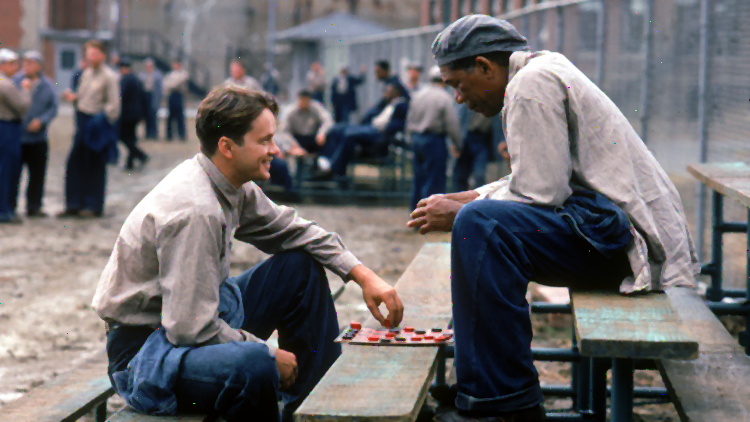

In [ ]:
#Solution (non-linear filters)
import cv2
import numpy as np

# Load an image
im_arr = cv2.imread("/content/shawshank.png")

#the noise here is random. Hence,
#10 points for using median filter
#-5 for using gaussian filter

# Apply median filter
median = cv2.medianBlur(im_arr,3)

# Display the image
cv2_imshow(median)

**2.3.** This TV channel made a horrible mistake (TV.jpg). Could you help them out and fix it? Use box and gaussian filters and compare. (/10)

<a href="https://imgbb.com/"><img src="https://i.ibb.co/J5zJ75c/TV.jpg" alt="TV" border="0"></a>


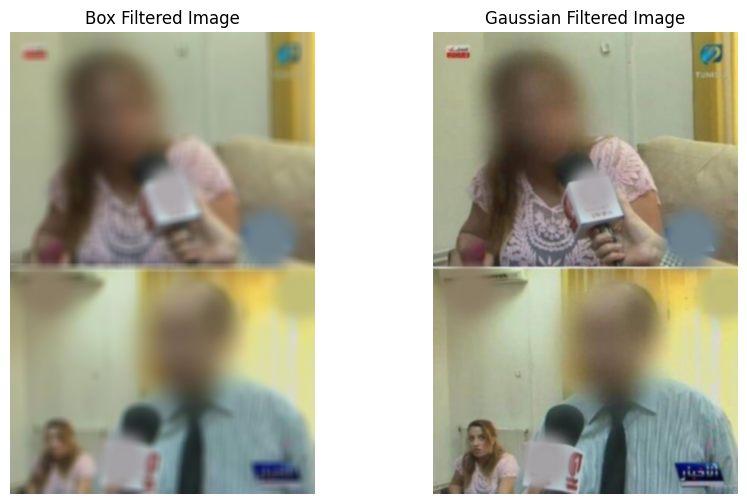

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/TV.jpg"
original_image = cv2.imread(image_path)

# Apply a box (mean) filter (3 points)
box_filtered_image = cv2.boxFilter(original_image, -1, (11, 11), normalize=True)

# Apply a Gaussian filter (3 points)
sigma = 1.0
gaussian_filtered_image = cv2.GaussianBlur(original_image, (11, 11), sigma)

# Display the images using matplotlib (2 point)
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# Box Filtered Image
axes[0].imshow(cv2.cvtColor(box_filtered_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Box Filtered Image')
axes[0].axis('off')

# Gaussian Filtered Image
axes[1].imshow(cv2.cvtColor(gaussian_filtered_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Gaussian Filtered Image')
axes[1].axis('off')

plt.show()

#2 point for the conclusion

**ANS:** Box filter is better in this case as it over smoothes edges which is needed here.

**2.4.** MNIST is a hand-written digits dataset. Sharpen the image obtained above by applying an appropriate kernel and show your results. The variable name of your image is called (img). [ /10]

11490434/11490434 [==============================] - 1s 0us/step
Please Enter your 5/6 digits AUS ID : 92415


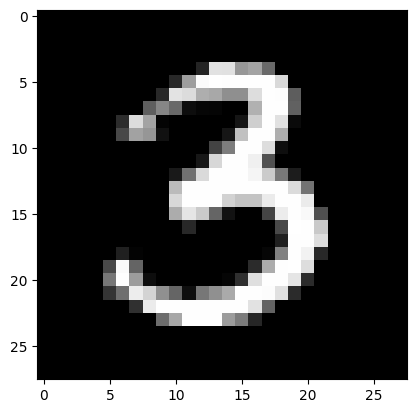

In [ ]:
# @title Run the following cell
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(train_images, _), (_, _) = mnist.load_data()

id = input("Please Enter your 5/6 digits AUS ID : ")


if len(id) < 5 or id.isdigit() == False:
    print("Please enter a valid AUS ID!")
    
else:
  img = train_images[(int(id) % len(train_images) - 1)]

  plt.imshow(img, cmap='gray')

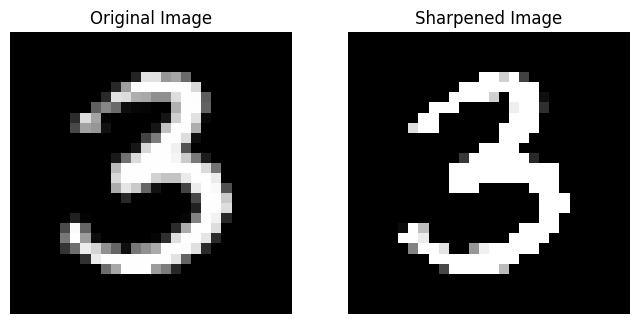

In [ ]:
# Solution (Other filters)
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define a sharpening kernel
#8 points -->
#(a positive value in the middle with a sum > 0)

kernel = np.array([[-1, -1, -1],
                  [-1, 9, -1],
                  [-1, -1, -1]])

# Apply the sharpening kernel using filter2D
result_image = cv2.filter2D(img, -1, kernel)

# 2 points --> Plot the results
plt.figure(figsize=(8, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')

plt.show()



---
**Q.3. On the edge** (/25)


---



**3.1.** Sign Language is a famous computer vision task. However, it needs a camera with a very high resolution to read images properly. Unfortunatly, with the background noise this task becomes very hard. Recent studies showed that the use of edge detectors can help solve this issue. Examine the sobel x and y derivatives and compare them to canny edge detector on the (hand.jpg) image provided. The background has been removed for simplicity. (/15)

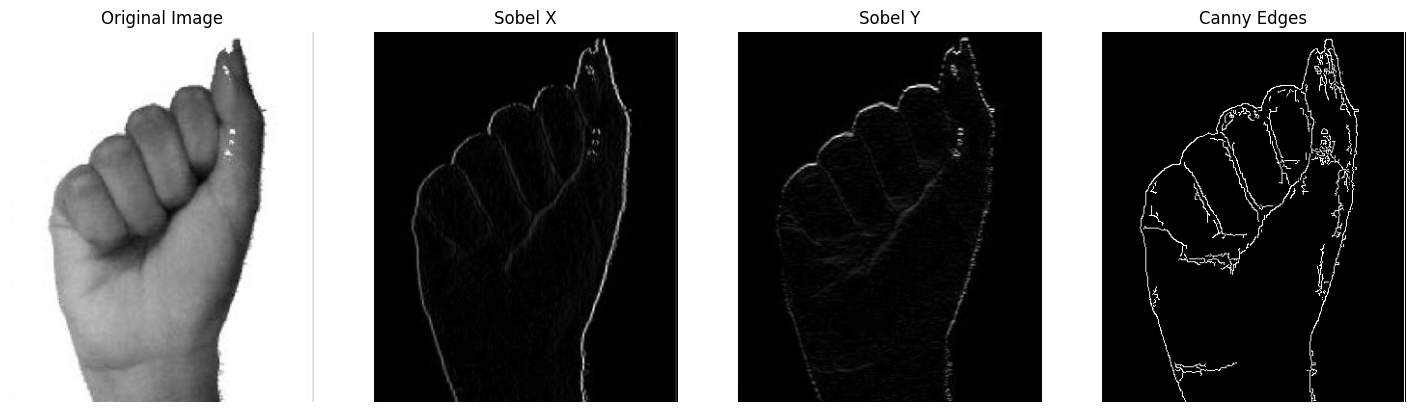

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image_path = "/content/hand.jpg"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel filter
sobel_x = cv2.Sobel(original_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(original_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the magnitude of the gradient
gradient_magnitude = np.sqrt(sobel_x**2 + sobel_y**2)

# Apply Canny edge detector
edges = cv2.Canny(original_image, 30, 100)  # Adjust the threshold values as needed

# Display the images using matplotlib
fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Original Image
axes[0].imshow(original_image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

# Sobel X
axes[1].imshow(np.abs(sobel_x), cmap='gray')
axes[1].set_title('Sobel X')
axes[1].axis('off')

# Sobel Y
axes[2].imshow(np.abs(sobel_y), cmap='gray')
axes[2].set_title('Sobel Y')
axes[2].axis('off')

# Canny Edges
axes[3].imshow(edges, cmap='gray')
axes[3].set_title('Canny Edges')
axes[3].axis('off')

plt.show()

**3.2.** Explain the working steps of a Canny Edge detector. Indicate the purpose of each step when applicable (/10)

**ANS:**

1. Smooth image (only want “real” edges, not noise)
2. Calculate gradient direction and magnitude
3. Non-maximum suppression perpendicular to edge
4. Threshold into strong, weak, no edge
5. Connect together components